# Data Exploration of a Retail Store called Cardio Good Fitness

#
QUESTION:
Explore the dataset to identify differences between the customers of each product. You can also explore relationships 
between the different attributes of the customers. You can approach it from any other line of questioning that you feel 
could be relevant for the business. The idea is to get you comfortable working in Python.

You are expected to do the following :

1. Come up with a customer profile (characteristics of a customer) of the different products
2. Perform univariate and multivariate analyses
3. Generate a set of insights and recommendations that will help the company in targeting new customers.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
cardio = pd.read_csv(r"C:\Users\Admin\Desktop\CardioGoodFitness.csv")    # To load the data
cardio

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,TM798,40,Male,21,Single,6,5,83416,200
176,TM798,42,Male,18,Single,5,4,89641,200
177,TM798,45,Male,16,Single,5,5,90886,160
178,TM798,47,Male,18,Partnered,4,5,104581,120


In [25]:
cardio.head(10)    # To see the first 10 rows

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47
5,TM195,20,Female,14,Partnered,3,3,32973,66
6,TM195,21,Female,14,Partnered,3,3,35247,75
7,TM195,21,Male,13,Single,3,3,32973,85
8,TM195,21,Male,15,Single,5,4,35247,141
9,TM195,21,Female,15,Partnered,2,3,37521,85


In [26]:
cardio.sample(10)  # To ramdonly check any 10 rows in the dataset

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
16,TM195,23,Female,14,Single,2,3,34110,103
110,TM498,26,Male,16,Single,4,3,51165,106
111,TM498,27,Male,14,Single,4,2,45480,53
95,TM498,24,Male,14,Single,3,4,48891,106
13,TM195,22,Female,14,Single,3,3,35247,75
51,TM195,29,Female,14,Partnered,2,2,46617,38
122,TM498,33,Male,16,Partnered,3,3,51165,95
96,TM498,24,Female,16,Single,3,3,50028,106
149,TM798,24,Male,16,Single,5,5,49801,160
87,TM498,23,Male,14,Partnered,3,3,36384,95


In [11]:
cardio.isna().sum()               # To see the number of missing values in the data

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

# - There are no missing values

In [12]:
cardio.info()   # To find the data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


#  
- There are 2 data types (numeric - integers and category - objects)
- There are 3 columns with categorical variables (Product, Gender and Maritalstatus)
- The rest (6) are numerical
- There is no column with floating, missing or empty values
- The dataset occupies memory space of 13KB by approximation
- There are 9 columns and 180 rows in the dataset

In [21]:
cardio.duplicated().sum()     # To check the duplicated rows

0

# - There is no duplication

In [6]:
cardio.shape   # To find the dimensions of the data

(180, 9)

 #  - There are 180 rows and 9 columns in this dataset

In [11]:
cardio.describe(include ="all")  # To find the descriptive statistics

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,TM195,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


# Insights from the descriptive statistics
- There are 3 unique/different products in the data but TM195 is the top product.
- From the 180 units of the 3 products sold, the top product is TM195 which occurs 80 times. Their customers have only 2 genders
(Male and Female) but the male customers patronized more (104) than the female. Out of the 180 customers who bought these 3 
products, 107 are partnered while others are single.
- The customer with the highest age is 50 years while the one with most years in education is 21 years. The user with the most
use-case is 7 times every week while the highest fitness score is 5. This highest income earner has 104,581 and
the highest miles covered is 360 when running.
- The customer with the least (minimum) age is 18 years while the least years in education is 12 years. The customer who least
uses their product uses it twice (2) every week. 
While the customer with the least fitness score is 1 and least earning is 29,562, the least miles covered while running is 21.
- 75% of these customers are aged less or equal to 33 years which is the upper quartile. The remaining 25% are above 33 years.
75% of them have 16 years or less in education and earn 58,668 income or less. 75% of them also have the fitness score of 4 or
less and use the product 4 (or less) times every week. 114.75 miles or less  are also covered by 75% of them when running.
- The average age is 28.8 years with average education of 15.6 years in education. The average usgae is 3.5 while the fitness 
score has average of 3.3. Ther average income is 53,720 with 103,19 as the average miles covered.
- 50% of these customers are 26 years of age while 16 years in education. 50% of them also use the product 3 times per week 
and have 3 as their fitness score while 50% income is 50,597 and lastly, 50% of these customers cover 94 miles when running.
- 25% percentile which means 25% of the customers have less or equal to 24 years of age. 25% of them also 14 years or less 
in education. 25% of them earn less or equal to 44,059. 66 miles or less are covered by 25% of them when running while
their fitness score and number of product usage is 3 or less for 25% of them.

In [9]:
cardio["MaritalStatus"].unique() # To know the unique marital status

array(['Single', 'Partnered'], dtype=object)

# 
- There are 2 marital status; Single and Partnered.

In [34]:
cardio["Product"].unique()   # To check the unique (different) products in the dataset

array(['TM195', 'TM498', 'TM798'], dtype=object)

# 
- There are 3 products in the dataset (TM195, TM498, and TM798)

In [74]:
cardio["Product"].value_counts()    # To know how many times each of the products was sold

TM195    80
TM498    60
TM798    40
Name: Product, dtype: int64

# Insights
- There 3 products; 80 units of TM195, 60 units of TM498, and 40 units of TM798 were sold 
- TM195 has the highest sales
- TM798 has the lowest sales

#                                      UNIVARIATE PLOTS

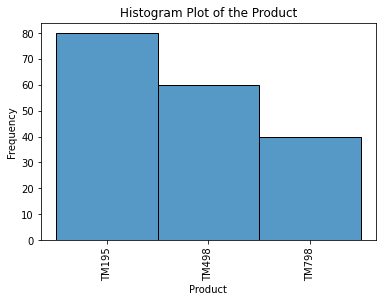

In [22]:
sns.histplot(data = cardio, x = "Product");
plt.title("Histogram Plot of the Product")
plt.xlabel("Product")
plt.ylabel("Frequency")
plt.xticks(rotation = 90)
plt.show()

# Histoplot of the Product:
Insights;
- TM195 has the highest frequency of 80, which implies it sells most.
- TM498 has frequency of 60 which is next to the highest. This product also sells more after TM195.
- TM798 has the least frequecy of 40. This product has the least sales.

Recommendation:

TM195 forms more than 44% of the total sales while both TM195 and TM498 form 78% of the total sales; hence
- The retail store should make more inventment (200% investment recommended) on TM195 to ensure the product is always available in the store
- Investment on TM498 should be increased by 50%
- Investment on TM798 should be the same or reduced by 20%
- More advertisement on both TM195 and TM498 to increase sales
- Awareness of TM798 should also be intensified. Promo should be encouraged on this product like, get a reduced price when 
  you buy either TM195 or TM498 with TM798.


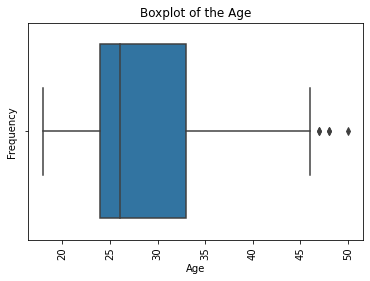

In [17]:
sns.boxplot(data = cardio, x = "Age");
plt.title("Boxplot of the Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.xticks(rotation = 90)
plt.show()

#  Boxplot of a numeric variable "Age"

Insights;

- The maximum age is 50 years and it is part of the outliers above the upper whisker
- The upper whisker is slightly above 45years(around 46.5 years)
- The median is 26 years while the customer with the least age is 18 years.
- The lower whisker is at 18 years while the lower quartile is 24 years or less and this represent 25% of the customers' age.
- The 75% percentile is at 33 years which implies 75% of the customers are aged 33 years or less. The remaining 25% are above 
33 years.
- The average age is 28.8 years.
- The distribution is skewed at the right hand.

Recommendation:
- All their customers are above 18 years and are all major. No minor in their customers.
- 75% of their customers are active youths with ages between 18 and 33 years.
- The average age and the median further buttress that majority of their customers are active youths.
- Thay should tailor more products that are youth friendly (Like enjoying live football while on patronage).


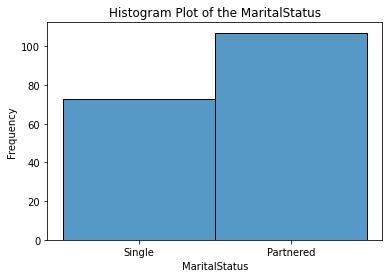

In [25]:
sns.histplot(data = cardio, x = "MaritalStatus");
plt.title("Histogram Plot of the MaritalStatus")
plt.xlabel("MaritalStatus")
plt.ylabel("Frequency")
plt.show()

# Histogram plot of a categorical variable "MaritalStatus"

Insights:
    
- Their customers are either single or partnered
- The customers with partners have the highest patronage(107)
- They have 73 single customers.

Recommendation;

- More than 59% of their customers are couples.
- Events that promote love should be introduced (like cinema) to promote retention and increase sales.

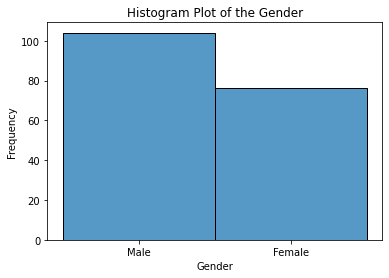

In [27]:
sns.histplot(data = cardio, x = "Gender");
plt.title("Histogram Plot of the Gender")
plt.xlabel("Gender")
plt.ylabel("Frequency")
plt.show()

# Histogram plot of a categorical variable "Gender"
- Their customers are either male or female
- The male customers patronize them more(104)


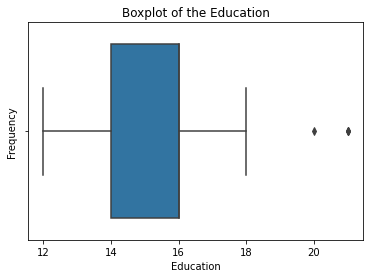

In [29]:
sns.boxplot(data = cardio, x = "Education");
plt.title("Boxplot of the Education")
plt.xlabel("Education")
plt.ylabel("Frequency")
plt.show()

# Boxplot of a numeric variable "Education"

Insights:
    
- The most educated customer has 21 years of education while the least educated has 12 years.
- 25% of their customers have 14 years (or less) in education which represents the lower percentile. Others are educated.
- 75% of their customers have 16 or less years in education and this forms the upper quartile. The remaining 25% are more 
educated.
- The upper whisker is at 18 years of education while the lower whisker is at 12 years.
- There are customers with more years of education above the upper whisker. They form the outliers.
- The mean and median are very close which impies the distribution is normal.
- The median and the 75% upper quartile are the same
- The distribution is skewed at the right hand.

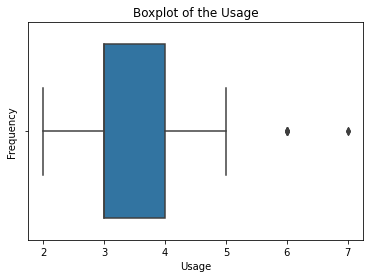

In [33]:
sns.boxplot(data = cardio, x = "Usage");
plt.title("Boxplot of the Usage")
plt.xlabel("Usage")
plt.ylabel("Frequency")
plt.show()

#  Boxplot of a numerical variable "Usage"

Insights:
    
- The customer with the highest patronage/usgage patronises them 7 times every week
- The least patronized customer uses them 2 times per week
- 75% of their customers patronize them 4 times per week or less. This is the upper quartile. Others patronize more.
- 25% of their customers patronize 3 times every week or less. This is the lower quartile. Others use them more.
- 50% of their customers patronize them 3 times every week.
- The plot has perfect normal distribution; the average usage (mean) and the median are the same.
- There are outliers above the upper wisker which implies that the distribution is skewed at the right hand
- The lower whisker is at 2 usage while the upper whisker is at 5.


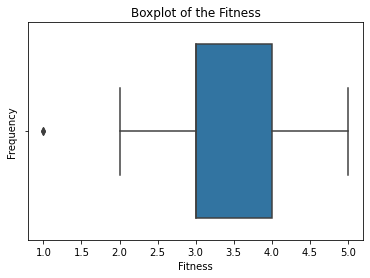

In [35]:
sns.boxplot(data = cardio, x = "Fitness");
plt.title("Boxplot of the Fitness")
plt.xlabel("Fitness")
plt.ylabel("Frequency")
plt.show()

# Boxplot of a numerical variable "Fitness"

Insights:
    
- The customer with the highest fitness score is 5 while the least is 1
- 75% of their customers have fitness score of 4 or less. Others have more. This is the upper quartile.
- 25% of their customers have fitness score of 3 or less. Others have more. This is the lower quartile.
- The average fitness score and the median are the same. Hence the distribution is perfectly normal.
- There is outlier below the lower whisker (fitness score of 2), hence the distribution is skewed at the left hand.
- The upper whisker is at fitness score of 4 while the lower whisker is at 2.

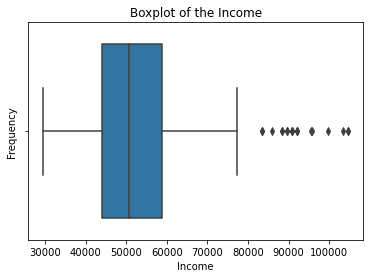

In [45]:
sns.boxplot(data = cardio, x = "Income");
plt.title("Boxplot of the Income")
plt.xlabel("Income")
plt.ylabel("Frequency")
plt.show()

# Boxplot of a numerical variable "Income"

Insights:
    
- Their customer with the highest income earns 104,581 while the least income is 29,562.
- The average income of their customers is 53,720 while 50,597 represents 50% of their income (Median).
- 75% of their customers earn 58,668 or less. This is the 75% percentile. Others earn more.
- 25% of them earn 44,059 or less. This is the 25% lower percentile. The remaining 75% earn more.
- The lower whisker is at the minimum income of 29,562 while the upper whisker is sligtly below 80,000.
- There are outliers above the upper whisker, hence the distribution is skewed at the right hand.


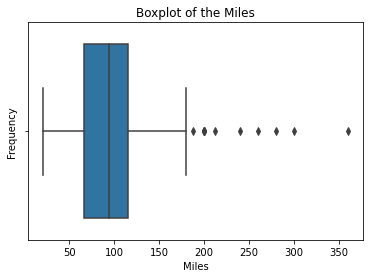

In [41]:
sns.boxplot(data = cardio, x = "Miles");
plt.title("Boxplot of the Miles")
plt.xlabel("Miles")
plt.ylabel("Frequency")
plt.show()

# Boxplot of the numerical variable "Miles"

Insights:
    
- The customer with the highest miles covered 360 miles while the least covered 21 miles.
- The average miles covered is 103.19 miles
- 50% of their customers covered 94 miles.
- 25% of them covered 66 miles. This represents the lower percentile. The rest covered more miles.
- 75% of their customers covered 115 miles. This is the 75% percentile. The remaining 25% covered more miles.
- The lower whisker is at 21 miles while the upper whisker is at 180 miles. 
- There are outliers above the upper whisker at the distribution is skewed the the right hand.

#                                          CORRELATION MAP

In [7]:
cardiofitness = cardio.corr()
cardiofitness                          # Calling our data, apply correlation method and save it in a new variable; cardiofitness

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


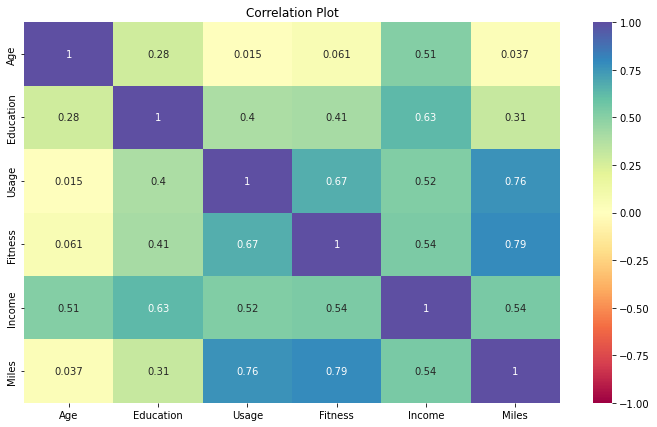

In [8]:
plt.figure(figsize=(12,7))
sns.heatmap(data =cardiofitness, annot= True, vmin= -1, vmax=1, cmap= "Spectral");
plt.title("Correlation Plot")
plt.show()                                                      # Heatmap to show relationships among the variables

#  Insights from the correlation map
- The miles and the fitness score are positively correlated at 0.79 (Twice).
- The miles and the usage are positively correlated at 0.76         (Twice).
- The income and the usage are positively correlated at 0.52        (Twice).
- The fitness score and the usage are positively corrected at 0.67  (Twice).
- The income and education are positively corrected at 0.63         (Twice).
- The income and fitness share positive correlation at 0.54         (Twice).
- The income and miles share positive correlation at 0.54
- Age and miles are positively correlated at 0.51.
  
Recommendation

- Since there is no highly positive correction in the dataset, all variables will be adopted.

Conclusion:
- Since all these variables have positive correlation with the product, increase per unit of any of these variables will increase the sales of the product and vice-versa.

 #                                   BIVARIATE PLOTS

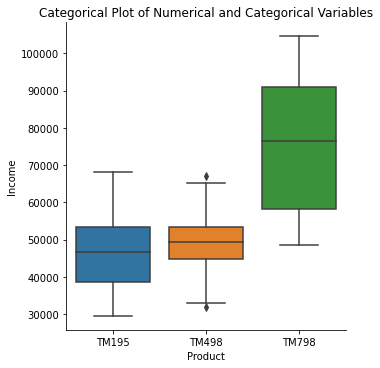

In [56]:
sns.catplot(data = cardio, x ="Product", y = "Income", kind = "box" );
plt.title("Categorical Plot of Numerical and Categorical Variables")
plt.xlabel("Product")
plt.ylabel("Income")
plt.show()

# Categorical plot of a numerical and a categorical variable

Insights:
    
- Majority of the highest income earners buy TM798 product.
- TM195 has the least income earner.
- The 50% (median) income of product TM498 equals the least income of the customers of product TM798.


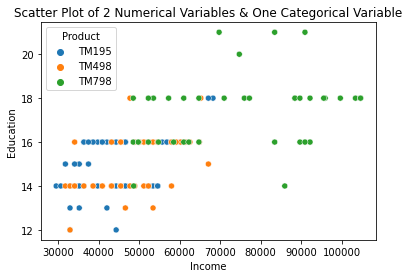

In [57]:
sns.scatterplot(data= cardio, x ="Income", y = "Education", hue ="Product");
plt.title("Scatter Plot of 2 Numerical Variables & One Categorical Variable")
plt.xlabel("Income")
plt.ylabel("Education")
plt.show()

 # Scatter plot of two numerical variables and a categorical variable
 
Insights:

- The highest income earner is 18 years
- The highest income earners and the most educated customers buy TM798 product
- The least educated customer buys TM498 and TM195 products
- The customer with the least income buys TM195 and has 14 years of education.
- Majority of the highest income earners buy TM798 product.
- The highest year of education of both TM498 and TM195 products buyers is 18 years.
- No buyer of both TM498 and TM195 products earns more than 70,000 income.

Conclusions:
- Since TM798 product has the least patronage, the product maybe too expensive for the low and middle income earners to afford. 
- The product maybe deemed as special product for the elite since majority of the most educated and higher income earners buy it.

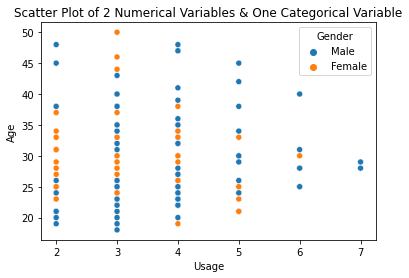

In [62]:
sns.scatterplot(data= cardio, x ="Usage", y = "Age", hue ="Gender");
plt.title("Scatter Plot of 2 Numerical Variables & One Categorical Variable")
plt.xlabel("Usage")
plt.ylabel("Age")
plt.show()

# Scatter plot of two numerical variables and a categorical variable

Insights:

- The male customers have the higest usage per week.
- The female customer is the oldest.
- Only one female customer patronize them 6 times per week. Others have less patronages.

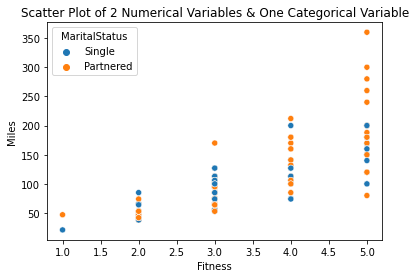

In [60]:
sns.scatterplot(data= cardio, x ="Fitness", y = "Miles", hue ="MaritalStatus");
plt.title("Scatter Plot of 2 Numerical Variables & One Categorical Variable")
plt.xlabel("Fitness")
plt.ylabel("Miles")
plt.show()

 # Scatter plot of two numerical variables and a categorical variable

Insights;

- The single customer has the lowest fitness score and covers the least milles
- The partnered customer has the highest fitness score and covers the longest miles.
- There are more partered customers with highest fitness score (5).
- They both have customers with the least fitness score (1).
- The partnered customer with the least fitness score (1) still covers more miles than the single customer with the least fitness score (1)

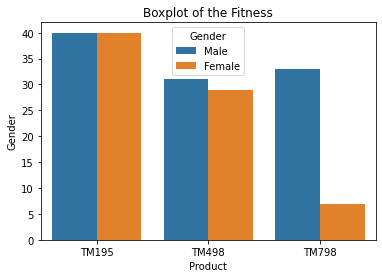

In [66]:
sns.countplot(data = cardio, x = "Product", hue= "Gender");
plt.title("Countplot of the Fitness")
plt.xlabel("Product")
plt.ylabel("Gender")
plt.show()

# Countplot of two categorical variables "Product" and "Gender"

Insights:

- Both male and female customers buy TM195 products equally
- The male customers buy TM798 product more than the female customers.
- For all the products, the male customers patronize them more.
- Majority of the female customers do not prefer product TM798. Only few of them do.

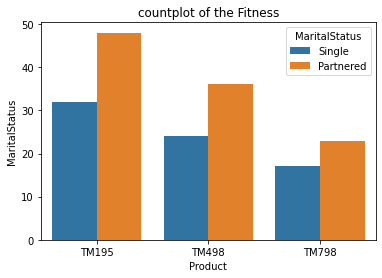

In [73]:
sns.countplot(data = cardio, x = "Product", hue= "MaritalStatus");
plt.title("countplot of the Fitness")
plt.xlabel("Product")
plt.ylabel("MaritalStatus")
plt.show()

# Countplot of two categorical variables "Product" and "MaritalStatus"

Insights:

- Both the single and the partnered customers buy more of TM195 than other products
- TM798 is least preferred by both the single and the partnered customers.
- For all the products, the customers with partners patronize them more.

# General Recommendations
- TM195 has the highest patronage. More investment is recommended for this product. Promotion should also be run to attract new
customers and reward the customers with highest patronages.
- TM798 is being regarded as elite product as its major buyers are the highest income earners and customers with several years
of education. It has the lowest patronage. This could mean that it is expensive and only the high income earners can
afford it. The Customer referral promotion should be run to attract more high income earners to increase sales per unit while
the existing customers/buyers should also be rewarded for referral and patronage.
- TM498 is both preferred by both male and female customers but more preferred by the partnered customers. This could mean that
it has tendency to ignite love. This product should be promoted more on valentine days and days when love is being celebrated to capture more couples and increase sales. More investment is also required as it is the second best product in terms of sales per unit.
- All products seem to be loved more by the partnered customers. The partnered customers have the highest fitness score and cover more miles when running. This could mean that these products help boost their exercise-abilities.
- The three (3) products do not promote abuse. No minor among their customers.
- All their customers are youths. The oldest is 50 years and the youngest is 18 years. More awareness should be done to capture
more youths to boost sales. Events that promote in-gatjering of youths (like live sport) should be inculcated.
- All their customers are very educated. Promotion that encourges education should be run to attract more educated people.